In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc #(my add on desc)
from sqlalchemy import text, inspect #my added

In [6]:
# create engine to hawaii.sqlite
# engine = create_engine("sqlite:///Resources/hawaii.sqlite") #original code given before I added a folder
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model 
#code below is from 2.1 activity folder 10
Base = automap_base()
Base.prepare(autoload_with=engine)
#Base.prepare(engine, reflect=True)

# reflect the tables
Base.classes.keys()

# #alternatively (from Adv SQL day 1 folder 3 act 2)
# inspector = inspect(engine)
# inspector.get_table_names()

# #alternatively
# Base = automap_base()
# Base.prepare(engine, reflect=True)
# Base.classes.keys()

['measurement', 'station']

In [8]:
#alternatively (from Adv SQL day 1 folder 3 act 2)
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
Base.classes.keys()

['measurement', 'station']

In [8]:
# View all of the classes that automap found (given)
Base.classes.keys()

['measurement', 'station']

In [11]:
#showing the top 5 rows of data w/in the specied classes (my add)
engine.execute(text('SELECT * FROM measurement LIMIT 5')).fetchall()
# engine.execute(text('SELECT * FROM station LIMIT 5')).fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [12]:
# Get a list of column names and types for each class (my add)
m_columns = inspector.get_columns('measurement')
for c in m_columns:
    print(c['name'], c["type"])
# m_columns

# s_columns = inspector.get_columns('station')
# for c in s_columns:
#     print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Save references to each table
measurement = Base.classes.measurement #measurements class
station = Base.classes.station #stations class

In [14]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first() #had to take from measurement class since it was the only one with prcp

#alt option
# session.query(func.max(measurement.date)).scalar()

('2017-08-23',)

In [ ]:
#my add
# recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]

In [13]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [14]:
# date=dt.datetime(2017, 8, 23, 9, 0) #last two is the time

In [22]:
# Calculate the date one year from the last date in data set. (my add)
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# query_date = recent_date - dt.timedelta(days=365) #not sure why this doesn't work
query_date
# print("Query Date: ", query_date)

#alt option
# latest_date = session.query(func.max(measurement.date)).scalar()
# query_date = dt.datetime.strptime(latest_date, "%Y-%m-%d") - dt.timedelta(days=365)
# query_date

datetime.date(2016, 8, 23)

In [23]:
# Perform a query to retrieve the data and precipitation scores (my add)
results = session.query(measurement.date, measurement.prcp).filter(measurement.date>=query_date).all()
results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

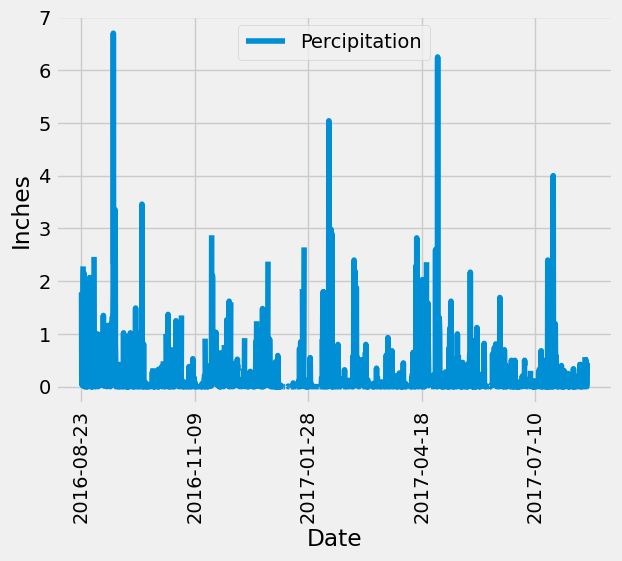

Text(0, 0.5, 'Inches')


In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# session.query(measurement.date).order_by(measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date>=query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(results, columns=["Date", "Percipitation"])
# prcp_df["Date"] = pd.to_datetime(prcp_df["Date"]) #converting 'Date' to column for proper plotting, which irronically was not allowing the days to show in the graph

# Sort the dataframe by date
prcp_df.sort_values("Date", inplace=True)

# prcp_df.set_index("Date", inplace=True) #set date as index

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(kind="line", x="Date", y="Percipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.legend(loc="upper center")
# plt.tight_layout()
plt.show()

label= plt.ylabel("Inches")
print(label)

In [ ]:
#alt plotting - my add
# plt.plot(prcp_df["Date"], prcp_df["Precipitation"])
# plt.xlabel("Date")
# plt.ylabel("Inches")
# plt.legend(loc="upper right")
# # plt.title("Precipitation Over the Past Year")
# plt.xticks(rotation=90)
# # plt.tight_layout()
# plt.show()

In [1]:
# prcp_df.head()

Text(0, 0.5, 'Inches')

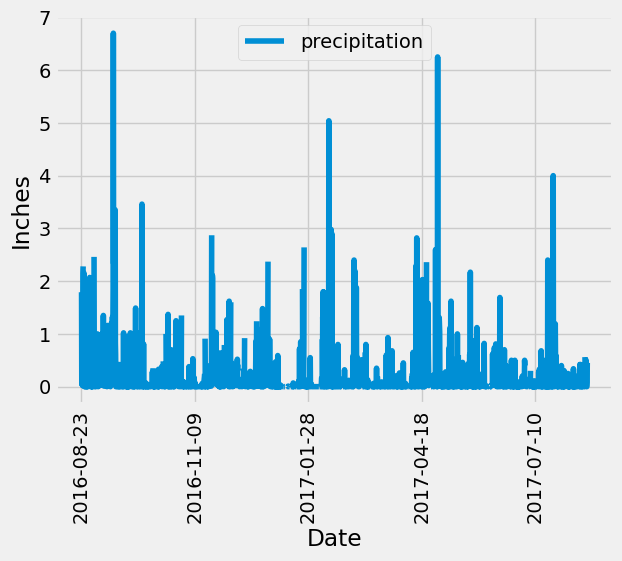

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [25]:
# (whatever variable I designate).describe (my add)
prcp_df.describe()

#prcp_df["Date"] = pd.to_datetime(prcp_df["Date"]) - adding this in the plot would create another column w/in the descriobe table

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [26]:
#list of all the stations (my add)
stations = session.query(station.station).all()
stations

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [27]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(station.station)).scalar()
total_stations
# print(f"Total number of stations: {total_stations}")

#SQL code
# SELECT COUNT(station) FROM stations;

9

In [ ]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(station.station)).scalar()
total_stations
#not sure how to get it bracketed like shown below

[(9,)]

In [28]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(
    measurement.station,
    func.count(measurement.station).label('station_count')
).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

# session.query(measurement.station,func.count(measurement.station).label('station_count')).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(
    measurement.station,
    func.count(measurement.station).label('station_count')
).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
#most active station ID (my add)
active_station = (
            session.query(measurement.station, func.count(measurement.station))
            .group_by(measurement.station)
            .order_by(desc(func.count(measurement.station)))
            .first()
)
active_station

#SQL
# SELECT MIN(tobs), MAX(tobs), AVG(tobs)
# FROM measurements
# WHERE station = 'your_most_active_station_id';

('USC00519281', 2772)

In [23]:
#updated most active station ID (my add)
active_station[0] #adding the bracket only shows the station and not the count along with it
station_id = active_station[0]
station_id
# print(f"Most active station ID: {station_id}") #need to use a df variable above in order to just print the station ID

'USC00519281'

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# active_station
active_station = (
            session.query(measurement.station, func.count(measurement.station))
            .group_by(measurement.station)
            .order_by(desc(func.count(measurement.station)))
            .first()
)

station_id = active_station[0]

#temp stats
temp_stats = (
    session.query(
        func.min(measurement.tobs).label("Min Temp"),
        func.max(measurement.tobs).label("Max Temp"),
        func.avg(measurement.tobs).label("Avg Temp")
    )
    .filter(measurement.station == station_id)
    .all()
)
temp_stats
#this gave me the same outputs calculated individually in pgAdmin and what was initially provided as the output

[(54.0, 85.0, 71.66378066378067)]

In [30]:
#recent date
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date

datetime.date(2016, 8, 23)

In [31]:
#calculate the data from the past 12 mo - my add
past_12_mo = (
    session.query(measurement.tobs)
    .filter(measurement.station == station_id)
    .filter(measurement.date >= query_date)
    .all()
)
# past_12_mo

# Display the first 5 rows to confirm
for result in results[:5]:
    print(result)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)


In [56]:
# # convert to temps
# temps = [past_12_mo[0] for results in results[:5]]
# temps

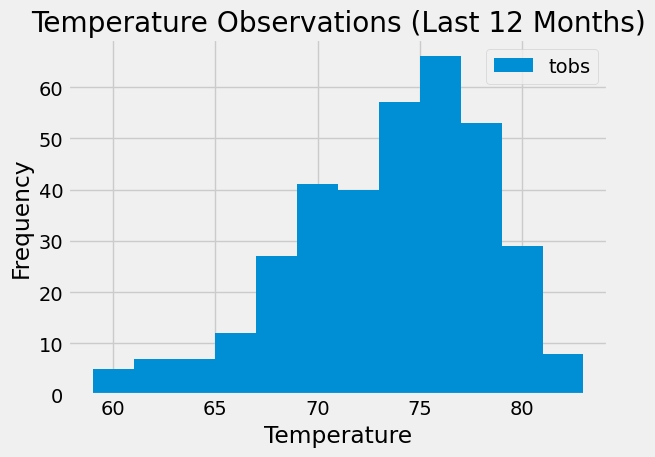

Text(0.5, 0, 'Temperature')


In [32]:
#calculate the data from the past 12 mo
past_12_mo = (
    session.query(measurement.tobs)
    .filter(measurement.station == station_id)
    .filter(measurement.date >= query_date)
    .all()
)

#convert to temps
temps_df = pd.DataFrame(past_12_mo, columns=["tobs"])

# Plot the histogram
# plt.figure(figsize=(6.4)) #unecessary as it creates an addition empty graph
plt.hist(temps_df["tobs"], bins=12, label="tobs")

# Add labels and title
plt.title("Temperature Observations (Last 12 Months)")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Add a legend
plt.legend(loc="upper right")

# Display the plot
plt.tight_layout()
plt.show()

label = plt.xlabel("Temperature")
print(label) #the middle value is off from the output not sure why...

Text(0.5, 4.183333333333314, 'Temperature')

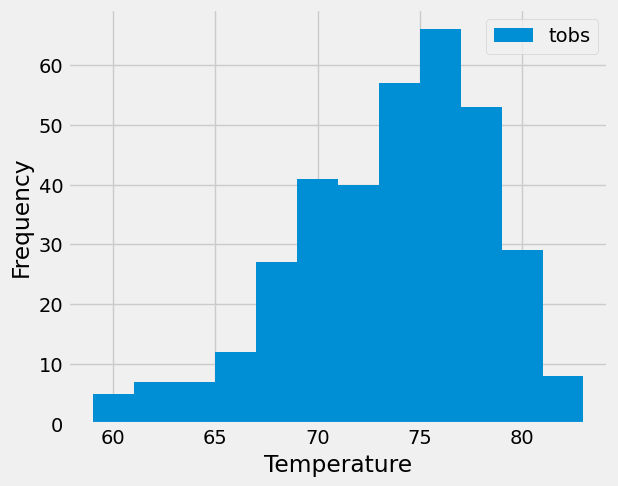

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Close Session

In [33]:
# Close Session
session.close()